# Image Object Detection

In [1]:
!pip install transformers
!pip install gradio
!pip install timm
!pip install inflect
!pip install phonemizer
!pip install helper 


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### Build the `object-detection` pipeline using 🤗 Transformers Library

In [2]:
from transformers import pipeline

c:\Users\Cortes\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from transformers.utils import logging
logging.set_verbosity_error()


Info about facebook/detr-resnet-50 https://huggingface.co/facebook/detr-resnet-50

In [4]:
od_pipe = pipeline("object-detection", "facebook/detr-resnet-50")


In [8]:
# Load model directly
from transformers import AutoImageProcessor, AutoModelForObjectDetection

In [9]:
model = AutoModelForObjectDetection.from_pretrained("facebook/detr-resnet-50")

# Model Architecture

In [10]:
model

DetrForObjectDetection(
  (model): DetrModel(
    (backbone): DetrConvModel(
      (conv_encoder): DetrConvEncoder(
        (model): FeatureListNet(
          (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
          (bn1): DetrFrozenBatchNorm2d()
          (act1): ReLU(inplace=True)
          (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
          (layer1): Sequential(
            (0): Bottleneck(
              (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (bn1): DetrFrozenBatchNorm2d()
              (act1): ReLU(inplace=True)
              (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn2): DetrFrozenBatchNorm2d()
              (drop_block): Identity()
              (act2): ReLU(inplace=True)
              (aa): Identity()
              (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      

## Use the Pipeline to detect objects in an image

In [11]:
from PIL import Image
import requests

In [12]:
img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg'

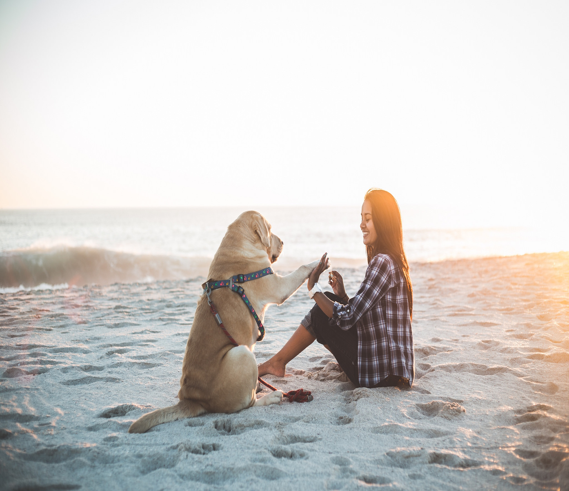

In [13]:
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')
raw_image.resize((569, 491))

In [14]:
pipeline_output = od_pipe(raw_image)

In [15]:
processed_image = raw_image, pipeline_output

In [16]:
processed_image = raw_image, pipeline_output

In [17]:
processed_image

(<PIL.Image.Image image mode=RGB size=2048x1365>,
 [{'score': 0.9993270635604858,
   'label': 'dog',
   'box': {'xmin': 456, 'ymin': 580, 'xmax': 1185, 'ymax': 1208}},
  {'score': 0.9996917247772217,
   'label': 'person',
   'box': {'xmin': 923, 'ymin': 522, 'xmax': 1496, 'ymax': 1091}}])

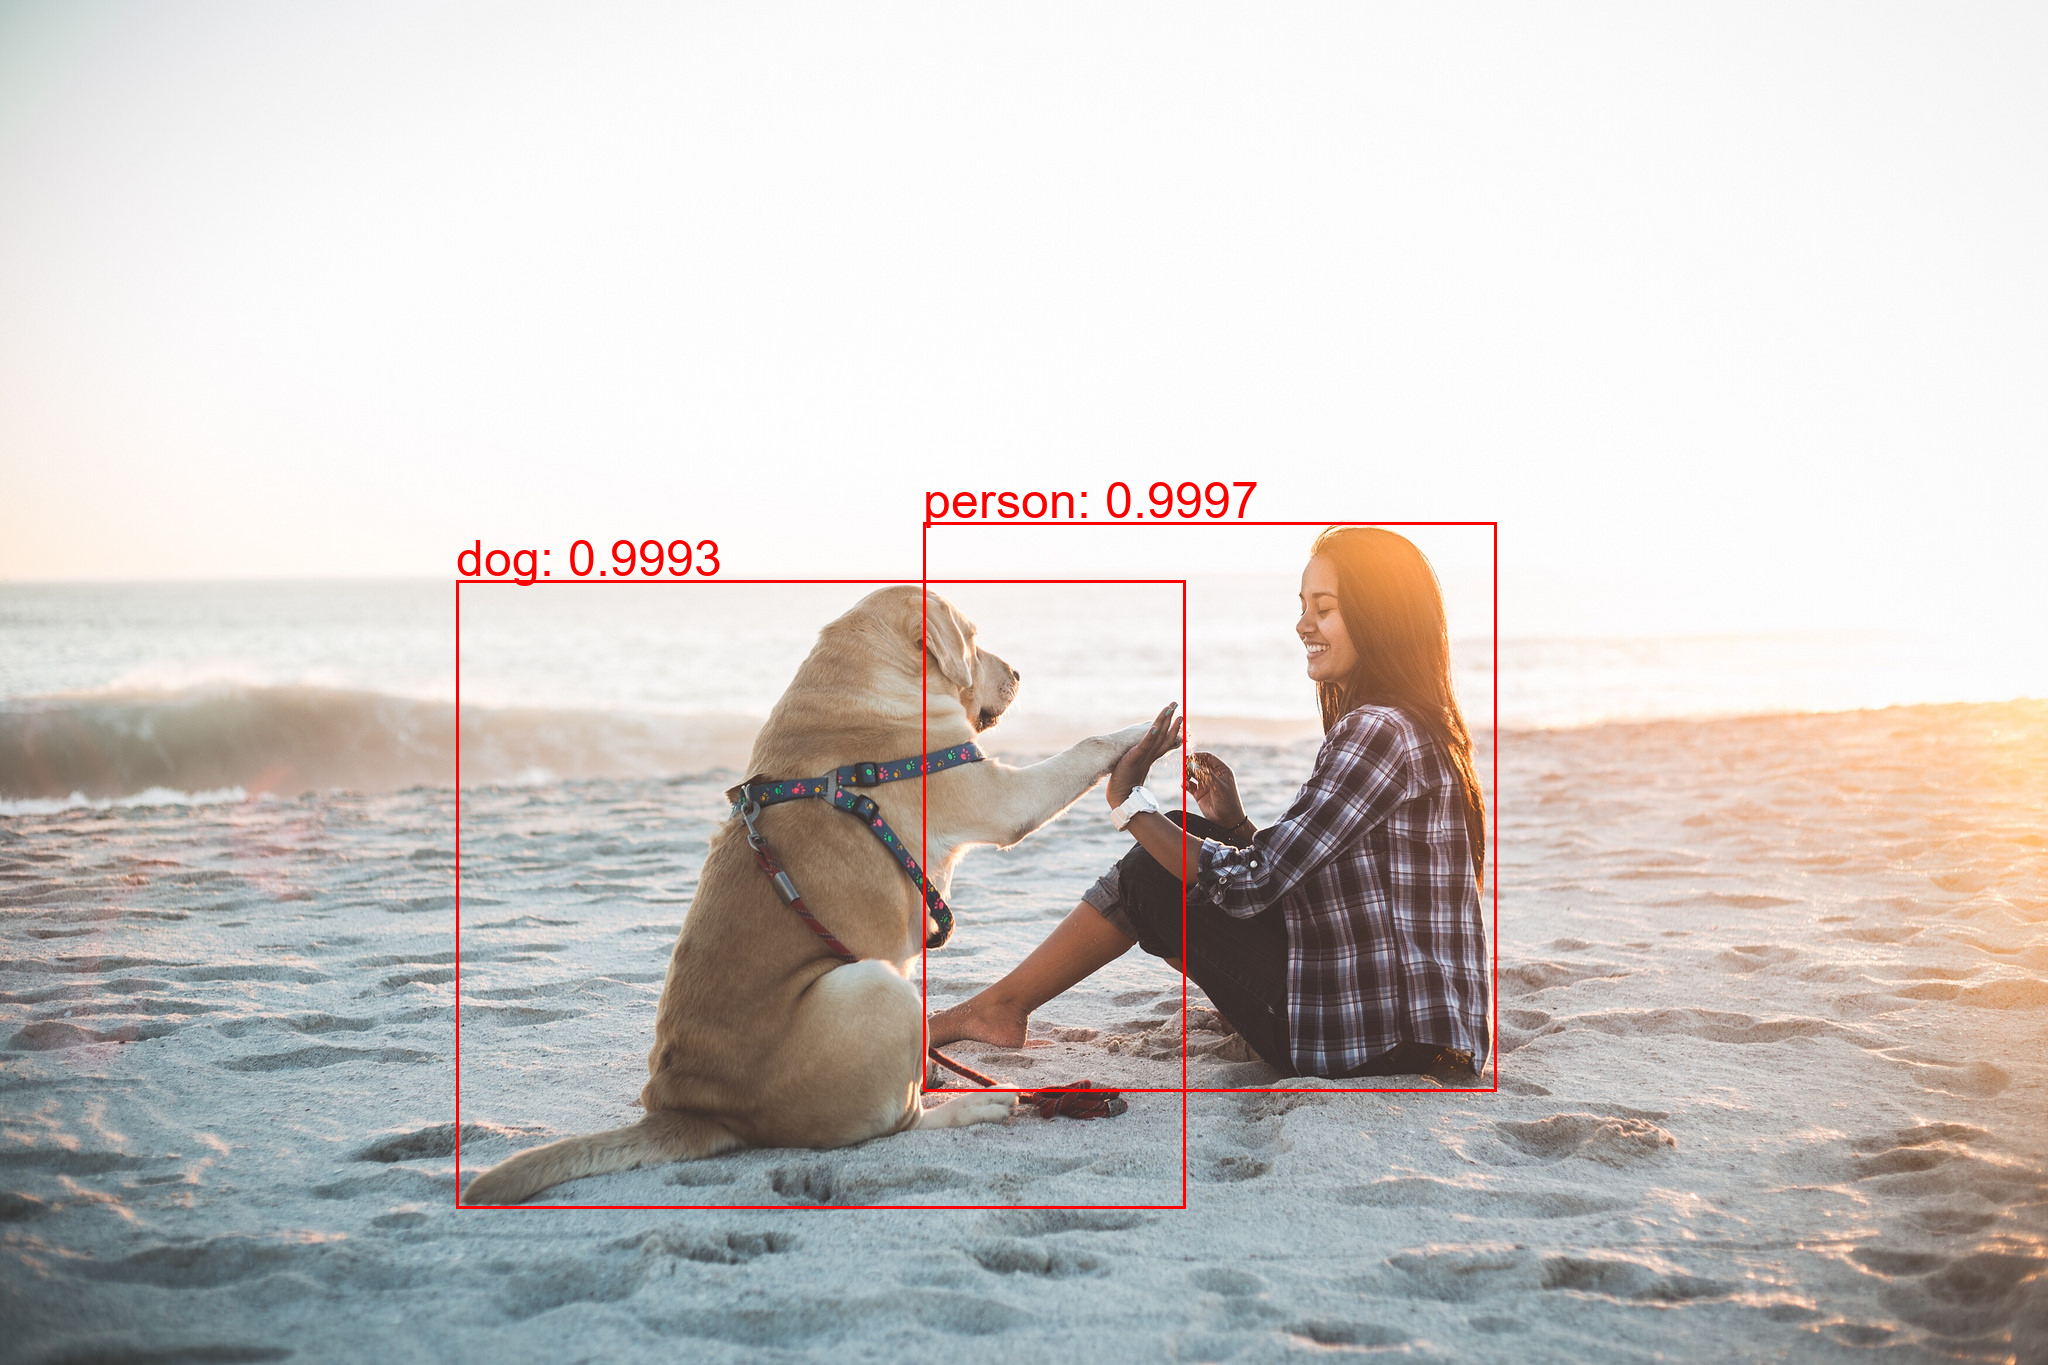

In [18]:
from PIL import Image, ImageDraw, ImageFont

def render_results_in_image(image, results):
    # Create an ImageDraw object to draw on the image
    im = image.copy()
    draw = ImageDraw.Draw(im)
    
    # Specify the font size
    font_size = 50  # Adjust the font size as needed
    font = ImageFont.truetype("arial.ttf", font_size)  # Use a specific font from your system
    
    for result in results:
        score = result['score']
        label = result['label']
        box = result['box']
        
        # Convert the score to string and round to desired precision, e.g., 3 decimal places
        score_str = f"{score:.4f}"  # Adjust the format specifier as needed for precision
        
        # Draw the bounding box
        draw.rectangle([box['xmin'], box['ymin'], box['xmax'], box['ymax']], outline="red", width=3)
        
        # Draw the text (label and score) near the bounding box
        # Adjust the position as needed
        text_position = (box['xmin'], box['ymin'] - font_size)
        draw.text(text_position, f"{label}: {score_str}", fill="red", font=font)

    return im

# Now call your function with the image and results
final_image = render_results_in_image(*processed_image)

# To display the final image in a Jupyter notebook environment, you might use
display(final_image)
